In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.linalg import eig

In [3]:
from numpy.linalg import eig

In [4]:
data=np.array([[3,4],[2,8],[6,9],[10,12]])

In [5]:
data

array([[ 3,  4],
       [ 2,  8],
       [ 6,  9],
       [10, 12]])

In [6]:
data.T

array([[ 3,  2,  6, 10],
       [ 4,  8,  9, 12]])

In [8]:
np.mean(data.T,axis=1)

array([5.25, 8.25])

In [9]:
meanbycol=np.mean(data,axis=0)

In [11]:
scaled_data=data-meanbycol

In [13]:
#step 2 finding covariance
cov_mat=np.cov(scaled_data.T)

In [15]:
#step 3 eigen value and eigen vector
eig_val,eig_vect=np.linalg.eig(cov_mat)

In [16]:
eig_val

array([21.55203266,  2.28130068])

In [17]:
eig_vect

array([[ 0.74289445, -0.66940857],
       [ 0.66940857,  0.74289445]])

In [19]:
eig_vect.T.dot(scaled_data.T).T

array([[-4.51649894, -1.65113213],
       [-2.58175911,  1.98985424],
       [ 1.05922727,  0.05511441],
       [ 6.03903078, -0.39383652]])

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca=PCA()

In [24]:
pcs=pca.fit_transform(scaled_data)

In [25]:
pd.DataFrame(pcs,columns=['PC1','PC2'])

,PC1,PC2
0,-4.516499,-1.651132
1,-2.581759,1.989854
2,1.059227,0.055114
3,6.039031,-0.393837


In [28]:
pca.inverse_transform(pcs)

array([[-2.25, -4.25],
       [-3.25, -0.25],
       [ 0.75,  0.75],
       [ 4.75,  3.75]])

In [29]:
pca.explained_variance_ratio_

array([0.90428109, 0.09571891])

In [30]:
0.90428109+0.09571891

1.0

In [32]:
pwd()

'C:\\Users\\pruth'

In [41]:
df=pd.read_csv("glass.data",index_col=None)

In [42]:
df.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [43]:
df.columns

Index(['1', '1.52101', '13.64', '4.49', '1.10', '71.78', '0.06', '8.75',
       '0.00', '0.00.1', '1.1'],
      dtype='object')

In [45]:
df2=df.drop(labels=['1','1.1'],axis=1)

In [49]:
df2.isnull().sum()

1.52101    0
13.64      0
4.49       0
1.10       0
71.78      0
0.06       0
8.75       0
0.00       0
0.00.1     0
dtype: int64

In [50]:
#PCA
#Step 1 standarization of data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [52]:
scale_data=scaler.fit_transform(df2)

In [55]:
scale_df=pd.DataFrame(data=scale_data,columns=df2.columns)

In [57]:
scale_df.describe().T

,count,mean,std,min,25%,50%,75%,max
1.52101,213.0,-4.432552e-15,1.002356,-2.376110,-0.604667,-0.222009,0.262911,5.138502
13.64,213.0,-1.719021e-15,1.002356,-3.278544,-0.620689,-0.130762,0.518391,4.866495
4.49,213.0,4.691083e-16,1.002356,-1.862164,-0.407814,0.559433,0.642937,0.907364
1.10,213.0,-2.397665e-17,1.002356,-2.319047,-0.514381,-0.173500,0.367899,4.117593
71.78,213.0,1.460021e-14,1.002356,-3.684153,-0.485635,0.174787,0.563271,3.567547
0.06,213.0,-5.525054e-17,1.002356,-0.766090,-0.566550,0.093464,0.170210,8.765749
8.75,213.0,-3.926176e-16,1.002356,-2.479079,-0.504492,-0.251520,0.156046,5.081972
0.00,213.0,7.297241e-16,1.002356,-0.353808,-0.353808,-0.353808,-0.353808,5.983278
0.00.1,213.0,-1.459448e-16,1.002356,-0.588301,-0.588301,-0.588301,0.438815,4.649990


In [58]:
from sklearn.decomposition import PCA
pca=PCA()

In [59]:
pca.fit_transform(scale_df)

array([[-0.57740964, -0.75555522, -0.54131111, ..., -0.02855076,
        -0.28624473, -0.01052633],
       [-0.9422224 , -0.92494715, -0.54953705, ..., -0.3701861 ,
        -0.09768518,  0.0217974 ],
       [-0.14521009, -0.96082439, -0.10984278, ..., -0.0576203 ,
        -0.00500546,  0.09215013],
       ...,
       [-1.65315732,  3.28863753, -0.93120716, ...,  0.6730498 ,
        -0.89009734,  0.04644362],
       [-2.34437523,  2.76379413, -1.2408532 , ...,  0.67853223,
         0.07604161, -0.02742114],
       [-2.23570365,  3.03487926, -0.8950945 , ...,  0.46165628,
         0.06444171, -0.01953852]])

In [62]:
pca_df=pd.DataFrame(data=pca.fit_transform(scale_df))

In [61]:
scale_df.shape

(213, 9)

In [63]:
pca_df.shape

(213, 9)

In [65]:
va=pca.explained_variance_ratio_

In [67]:
max(va)*100

27.892524303208297

In [69]:
min(va)*100

0.01792090615258704

In [70]:
sum(va)

0.9999999999999999

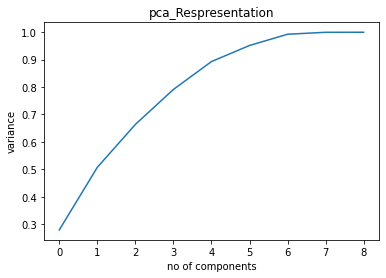

In [72]:
plt.figure()
plt.plot(np.cumsum(va))
plt.xlabel('no of components')
plt.ylabel('variance')
plt.title("pca_Respresentation")
plt.show()

In [74]:
sum(sorted(va,reverse=True)[:6])

0.9517159978858755